In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")
sns.set_context("poster")

In [8]:
train_df = pd.read_csv("train_infant.csv")
train_df.head()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
0,2,34,1,9,0,0,0,0,0,0,...,0,0,0,2,1,2,88,88,61,1
1,2,29,3,6,0,0,0,0,0,0,...,0,0,0,2,1,1,88,88,65,1
2,2,18,2,5,0,0,0,0,0,0,...,0,0,0,2,1,2,88,88,61,1
3,1,29,1,6,0,0,0,0,0,0,...,3,3,3,2,0,2,88,88,68,1
4,1,36,1,9,0,0,0,0,3,3,...,0,0,0,2,1,3,5,5,64,1


In [11]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [12]:
train_df[train_df["Infant Living at Time of Report"] == 0]

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
42,1,27,2,7,0,0,0,0,0,0,...,0,0,0,2,0,2,5,5,60,0
204,1,22,3,4,0,0,0,0,0,0,...,0,0,0,2,0,2,3,3,61,0
255,1,26,2,7,0,0,0,0,0,0,...,0,0,0,2,1,5,7,7,60,0
388,1,25,1,4,0,0,0,0,0,0,...,0,0,0,2,1,4,88,1,62,0
789,1,18,1,4,0,0,0,0,0,0,...,0,0,0,2,0,1,4,1,62,0
836,1,31,1,5,0,0,0,0,1,0,...,0,0,0,2,0,5,8,8,67,0
930,1,28,1,5,0,0,0,0,0,0,...,0,0,0,2,1,4,88,88,67,0
1016,1,33,1,6,0,0,0,0,0,0,...,3,3,3,2,0,2,88,88,61,0
1086,1,19,1,4,0,0,0,0,0,0,...,0,0,0,2,1,3,88,88,66,0
1153,1,31,1,3,0,0,0,0,0,0,...,0,0,0,2,0,1,6,1,63,0


In [15]:
test_df = pd.read_csv("test_infant.csv")
test_df.head()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Gonorrhea,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches
0,1,27,1,9,0,0,0,0,0,0,...,0,0,0,0,2,0,2,88,88,62
1,1,25,1,6,0,0,0,0,0,0,...,0,0,0,0,1,1,5,88,5,66
2,1,20,1,6,0,0,0,0,0,0,...,0,0,0,0,2,0,9,88,88,99
3,1,17,2,4,0,0,0,0,0,0,...,0,0,0,0,2,1,3,88,88,66
4,1,24,2,5,0,0,0,0,0,0,...,0,0,0,0,1,0,2,3,3,66


In [17]:
train_df.shape

(40483, 30)

In [18]:
test_df.shape

(58, 29)

In [6]:
print(train_df.columns)

Index(['Birth Place Recode', 'Mothers Single Year of Age',
       'Month Prenatal Care Began Recode', 'Number of Prenatal Visits Recode',
       'Cigarettes Before Pregnancy ', 'Cigarettes 1st trimester',
       'Cigarettes 2nd trimester', 'Cigarettes 3rd trimester',
       'Prepregnancy Diabetes', 'Gestational Diabetes',
       'Prepregnancy Hypertension', 'Gestational Hypertension', 'Eclampsia',
       'Previous Preterm Birth', 'Infertility Treatment ',
       'Fertility Enhancing Drug', 'Number of previous Cesarean Deliveries',
       'Chronic Hypertension', 'Pregnancy Associated Hypertension',
       'Gonorrhea', 'Syphillis', 'Hepatitis B ', 'Hepatitis C ',
       'Induction of Labor', 'Sex of Infant ', 'BMI',
       'Interval Since Last Live Birth Recode 11',
       'Interval Since Last Pregnancy Recode 11', 'Mother's Height in Inches',
       'Infant Living at Time of Report'],
      dtype='object')


In [7]:
print(test_df.columns)

Index(['Birth Place Recode', 'Mothers Single Year of Age',
       'Month Prenatal Care Began Recode', 'Number of Prenatal Visits Recode',
       'Cigarettes Before Pregnancy ', 'Cigarettes 1st trimester',
       'Cigarettes 2nd trimester', 'Cigarettes 3rd trimester',
       'Prepregnancy Diabetes', 'Gestational Diabetes',
       'Prepregnancy Hypertension', 'Gestational Hypertension', 'Eclampsia',
       'Previous Preterm Birth', 'Infertility Treatment ',
       'Fertility Enhancing Drug', 'Number of previous Cesarean Deliveries',
       'Chronic Hypertension', 'Pregnancy Associated Hypertension',
       'Gonorrhea', 'Syphillis', 'Hepatitis B ', 'Hepatitis C ',
       'Induction of Labor', 'Sex of Infant ', 'BMI',
       'Interval Since Last Live Birth Recode 11',
       'Interval Since Last Pregnancy Recode 11', 'Mother's Height in Inches'],
      dtype='object')


In [8]:
train_df.describe()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
count,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,...,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000
mean,1.013388,25.754564,1.361954,6.928538,0.547217,0.531680,0.531729,0.530297,0.025937,0.039325,...,0.028654,0.029074,0.028926,1.990218,0.518119,2.792258,43.819183,41.407060,63.430650,0.996517
std,0.117483,6.061387,0.728585,1.781825,6.698181,6.862026,6.952868,6.981837,0.241488,0.266142,...,0.290095,0.290776,0.290536,0.736389,0.499678,1.298482,41.500572,41.855216,3.748972,0.058914
min,1.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000
25%,1.000000,21.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,5.000000,4.000000,62.000000,1.000000
50%,1.000000,25.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,8.000000,8.000000,63.000000,1.000000
75%,1.000000,30.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,88.000000,88.000000,65.000000,1.000000
max,3.000000,50.000000,5.000000,12.000000,99.000000,99.000000,99.000000,99.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,9.000000,1.000000,9.000000,99.000000,99.000000,99.000000,1.000000


In [9]:
train_df.tail()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
40478,1,17,2,2,0,0,0,0,0,0,...,0,0,0,2,0,2,88,88,62,0
40479,1,24,1,3,0,0,0,0,0,0,...,0,0,0,2,0,2,88,88,66,0
40480,1,31,2,5,0,0,0,0,0,0,...,0,0,0,2,0,2,88,88,67,0
40481,1,28,1,4,0,0,0,0,0,0,...,0,0,0,2,1,4,88,1,62,0
40482,1,22,1,5,0,0,0,0,0,0,...,0,0,0,2,1,3,88,88,60,0


In [10]:
train_df['Cigarettes 3rd trimester'].value_counts().index.tolist()

[0, 99, 10, 3, 1, 5, 2, 20, 4, 6, 7, 8, 40, 60, 9, 12, 90, 30]

In [11]:
train_df['Infant Living at Time of Report'].value_counts()

1    40342
0      141
Name: Infant Living at Time of Report, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

X_train = train_df[['Mothers Single Year of Age','Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]]
Y_train = train_df['Infant Living at Time of Report']

               
X_test = test_df[['Mothers Single Year of Age' , 'Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]]
#Y_test = test_df['Infant Living at Time of Report']

LogReg = LogisticRegression(penalty = 'l1',C = 0.6)
LogReg.fit(X_train,Y_train)

Y_pred = LogReg.predict(X_test)

#plt.scatter(Y_test, Y_pred)
#plt.xlabel("Prices: $Y_i$")
#plt.ylabel("Predicted prices: $\hat{Y}_i$")
#plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
#plt.show()
Y_pred =  list(Y_pred)

op = []
f = open('results_infant.csv')
for i in f :
    op.append(int(i.strip()))

print(classification_report(op,Y_pred))
print(accuracy_score(op,Y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.83      1.00      0.91        48

avg / total       0.68      0.83      0.75        58

0.8275862068965517


c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
print(op)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(Y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
print(f1_score(op, Y_pred, average='weighted', labels=np.unique(Y_pred)))

0.9056603773584907


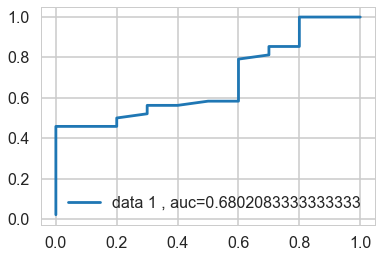

In [18]:
from sklearn import metrics
y_predict_proba = LogReg.predict_proba(X_test)[::,1]
fpr , tpr , _ = metrics.roc_curve(op , y_predict_proba)
auc = metrics.roc_auc_score(op , y_predict_proba)
plt.plot(fpr , tpr , label = "data 1 , auc="+str(auc))
plt.legend(loc = 4)
plt.show()

In [20]:
print("Accuracy", metrics.accuracy_score(op, Y_pred))

Accuracy 0.8275862068965517


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


classifier = RandomForestClassifier

kf = KFold(n_splits = 5 , random_state = 42)
accuracy = []
precision = []
recall = []
f1 =  []
auc = []

X_train = train_df[['Mothers Single Year of Age','Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]].values
Y_train = train_df[['Infant Living at Time of Report']].values.ravel()

X_test = test_df[['Mothers Single Year of Age' , 'Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]].values

Y_test = []
f = open('results_infant.csv')
for i in f :
    Y_test.append(int(i.strip()))




for train , test in kf.split(X_train , Y_train):
    pipeline = make_pipeline_imb(SMOTE() , classifier(random_state = 42))
    model = pipeline.fit(X_train[train] , Y_train[train])
    prediction = model.predict(X_train[test])
    
    accuracy.append(pipeline.score(X_train[test], Y_train[test]))
    precision.append(precision_score(Y_train[test], prediction))
    recall.append(recall_score(Y_train[test], prediction))
    f1.append(f1_score(Y_train[test], prediction))
    #auc.append(roc_auc_score(Y_train[test], prediction))
    
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

done right mean of scores 5-fold:
accuracy: 0.9792503908879538
precision: 0.9965361296810038
recall: 0.9826038247761246
f1: 0.9895088818873742


In [22]:
print(Y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
unique , counts = np.unique(Y_train[test] , return_counts = True)
dict(zip(unique , counts))

{0: 21, 1: 8075}

In [29]:
unique , counts = np.unique(prediction , return_counts = True)
dict(zip(unique , counts))

{0: 160, 1: 7936}